In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [3]:
with open('data/shell_comparison_RAL_big.json') as f:
    data = json.load(f)
    df_runs = pd.json_normalize(data)
    df_runs.columns = [col.split('.')[-1] for col in df_runs.columns]
    
    df_runs['planner'] = df_runs['planner'].str\
        .replace('cgal', 'Exact Geodesics')\
        .replace('cuttingplane', 'Cutting Plane Heuristic')\
        .replace('cylinder', 'Minimum Enclosing Cylinder')\
        .replace('sphere', 'Minimum Enclosing Sphere')

In [4]:
agged = df_runs.groupby(['scene','planner']).agg(['mean','sem'])[['total_experiment_runtime','total_path_length','n_visited']]

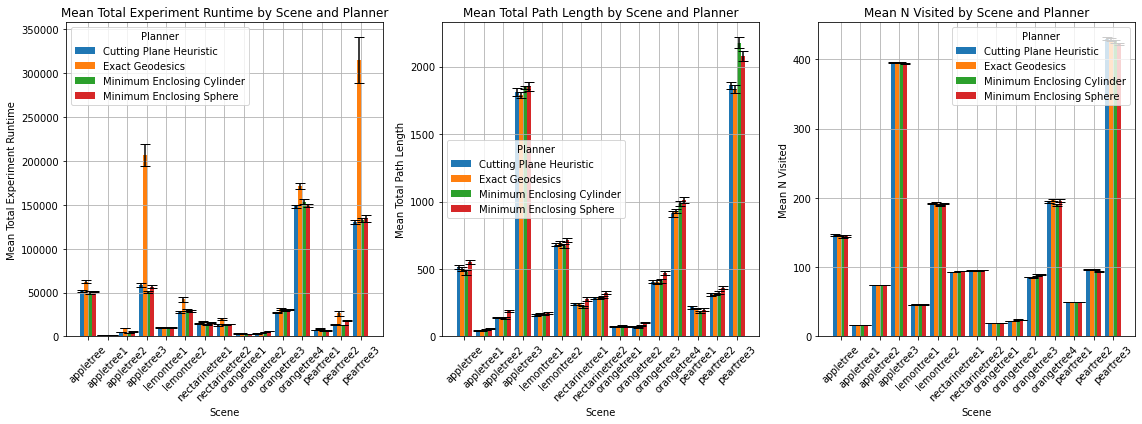

In [5]:
scene_order = agged.index.get_level_values('scene').unique()
planner_order = agged.index.get_level_values('planner').unique()

bar_width = 0.2
bar_positions = {}
for i, planner in enumerate(planner_order):
    bar_positions[planner] = [j + i * bar_width for j in range(len(scene_order))]
    
def create_grouped_bar_chart(ax, metric):
    for planner in planner_order:
        ax.bar(bar_positions[planner], agged.loc[pd.IndexSlice[:, planner], (metric, 'mean')], 
               width=bar_width, label=planner,
               yerr=agged.loc[pd.IndexSlice[:, planner], (metric, 'sem')] * 1.96,
               capsize=5)

    ax.set_xticks([pos + bar_width * (len(planner_order) - 1) / 2 for pos in bar_positions[planner_order[0]]])
    ax.set_xticklabels(scene_order, rotation=45)
    ax.set_xlabel('Scene')
    ax.set_ylabel(f'Mean {metric.replace("_", " ").title()}')
    ax.set_title(f'Mean {metric.replace("_", " ").title()} by Scene and Planner')
    ax.grid(True)
    ax.legend(title='Planner')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

create_grouped_bar_chart(ax1, 'total_experiment_runtime')
create_grouped_bar_chart(ax2, 'total_path_length')
create_grouped_bar_chart(ax3, 'n_visited')

plt.tight_layout()
plt.savefig('comparison_trees.pdf')
plt.show()

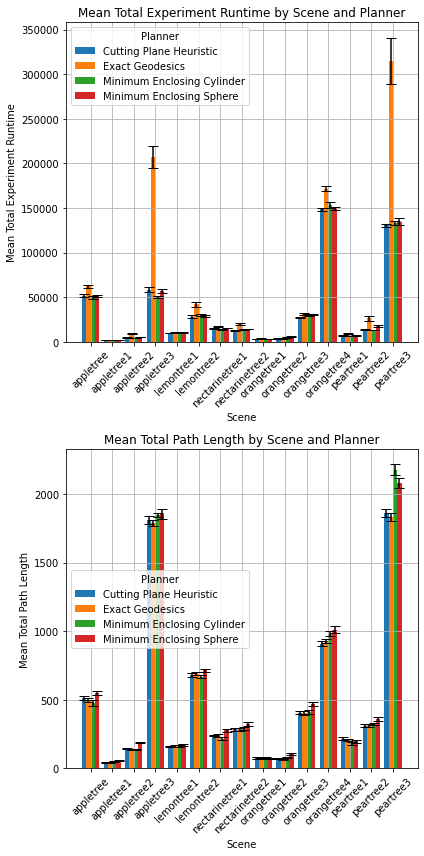

In [23]:
scene_order = agged.index.get_level_values('scene').unique()
planner_order = agged.index.get_level_values('planner').unique()

bar_width = 0.2
bar_positions = {}
for i, planner in enumerate(planner_order):
    bar_positions[planner] = [j + i * bar_width for j in range(len(scene_order))]


fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(6, 12))

create_grouped_bar_chart(ax1, 'total_experiment_runtime')
create_grouped_bar_chart(ax2, 'total_path_length')

plt.tight_layout()
plt.savefig('comparison_trees_vertical.pdf')
plt.show()

In [9]:
with open('data/shell_comparison_orchard_RAL.json') as f:
    data = json.load(f)
    df_runs_row = pd.json_normalize(data)
    df_runs_row.columns = [col.split('.')[-1] for col in df_runs_row.columns]

In [10]:
agged_orchard = df_runs_row.groupby(['scene','planner']).agg(['mean','sem'])[['total_experiment_runtime','total_path_length','n_visited']]

/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  ret

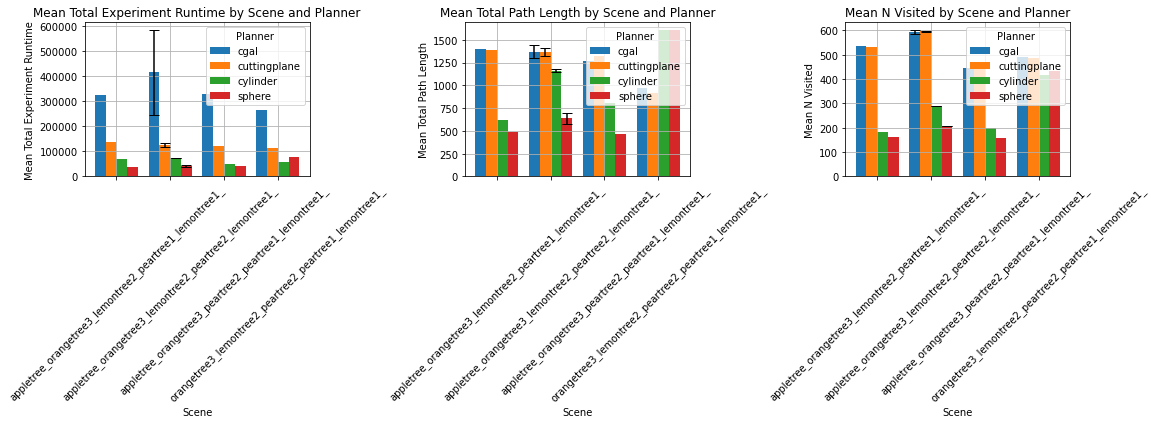

In [ ]:
scene_order = agged_orchard.index.get_level_values('scene').unique()
planner_order = agged_orchard.index.get_level_values('planner').unique()

bar_width = 0.2
bar_positions = {}
for i, planner in enumerate(planner_order):
    bar_positions[planner] = [j + i * bar_width for j in range(len(scene_order))]
    
def create_grouped_bar_chart(ax, metric):
    for planner in planner_order:
        ax.bar(bar_positions[planner], agged_orchard.loc[pd.IndexSlice[:, planner], (metric, 'mean')], 
               width=bar_width, label=planner,
               yerr=agged_orchard.loc[pd.IndexSlice[:, planner], (metric, 'sem')] * 1.96,
               capsize=5)

    ax.set_xticks([pos + bar_width * (len(planner_order) - 1) / 2 for pos in bar_positions[planner_order[0]]])
    ax.set_xticklabels(scene_order, rotation=45)
    ax.set_xlabel('Scene')
    ax.set_ylabel(f'Mean {metric.replace("_", " ").title()}')
    ax.set_title(f'Mean {metric.replace("_", " ").title()} by Scene and Planner')
    ax.grid(True)
    ax.legend(title='Planner')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

create_grouped_bar_chart(ax1, 'total_experiment_runtime')
create_grouped_bar_chart(ax2, 'total_path_length')
create_grouped_bar_chart(ax3, 'n_visited')

plt.tight_layout()
plt.savefig('comparison_trees_orchard.pdf')
plt.show()

In [31]:
os.listdir(dir_path)

['orangetree3.png',
 'peartree1.png',
 'appletree.png',
 'orangetree1.png',
 'peachtree2.png',
 'nectarinetree3.png',
 'peachtree3.png',
 'peachtree4.png',
 'appletree3.png',
 'peartree3.png',
 'peachtree1.png',
 'nectarinetree4.png',
 'lemontree2.png',
 'nectarinetree2.png',
 'lemontree4.png',
 'orangetree4.png',
 'plumtree3.png',
 'plumtree2.png',
 'nectarinetree1.png',
 'peartree2.png',
 'lemontree3.png',
 'appletree1.png',
 'orangetree2.png',
 'plumtree1.png',
 'plumtree4.png',
 'appletree2.png',
 'lemontree1.png']

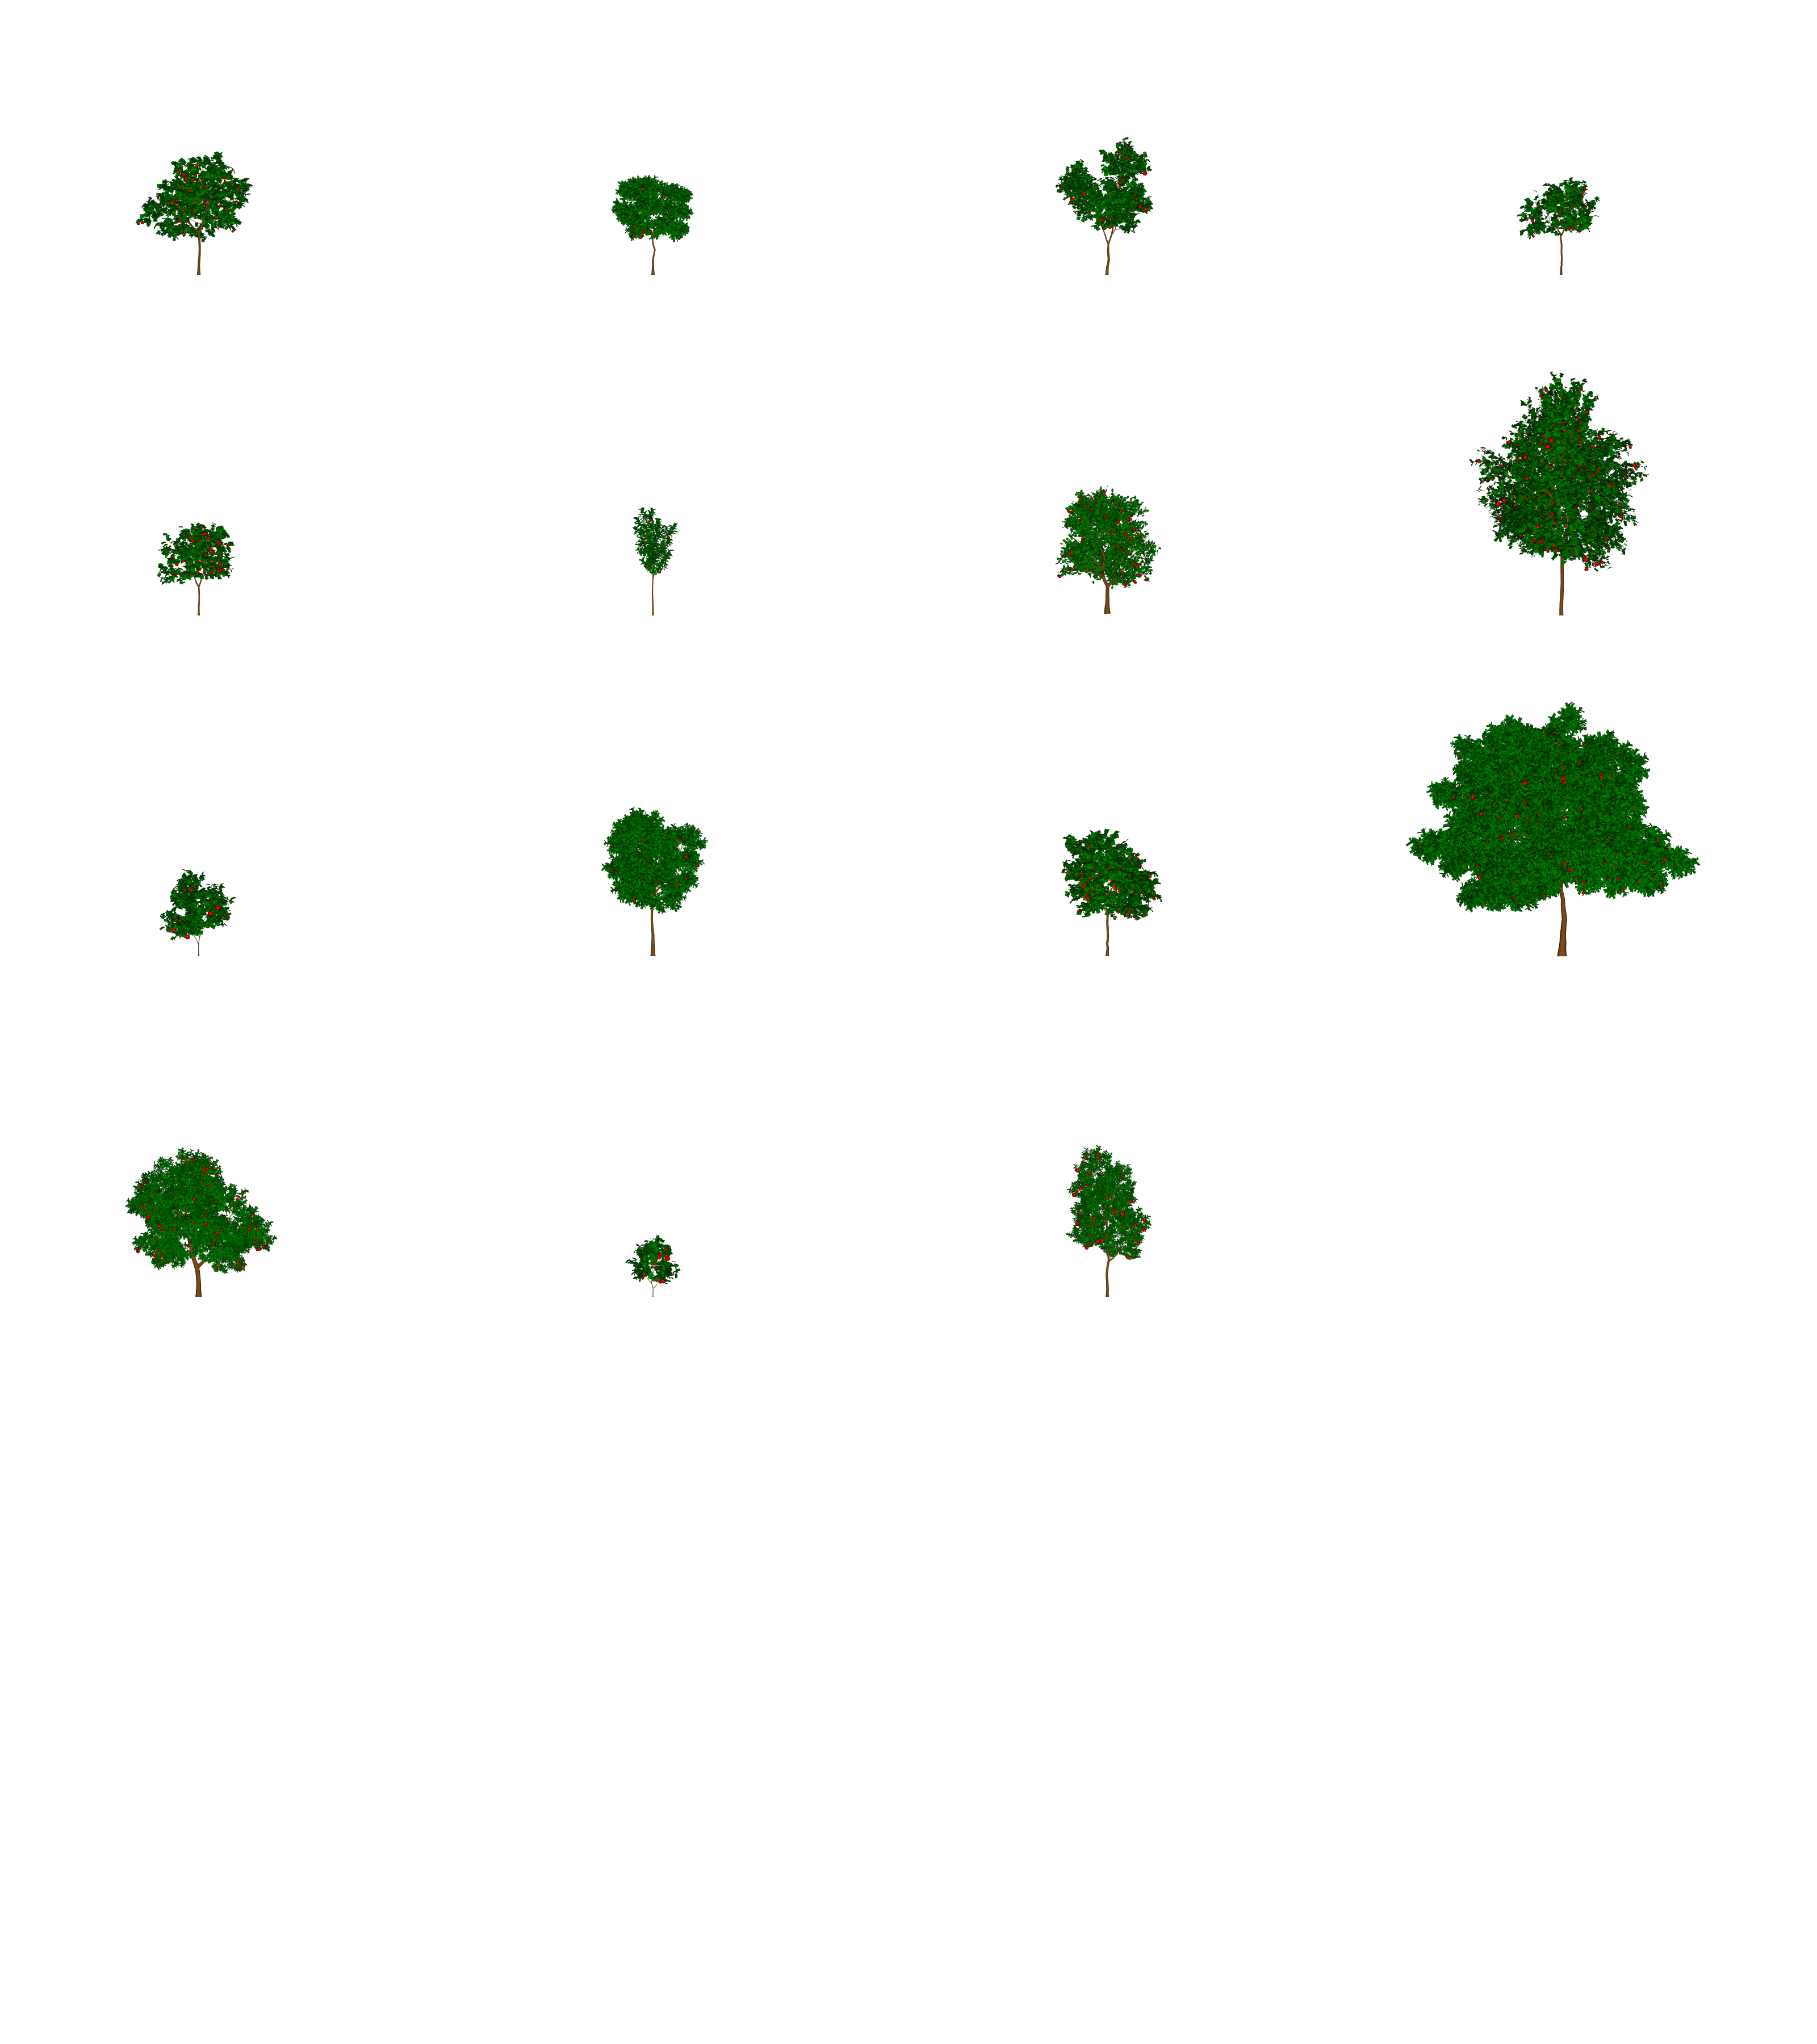

In [21]:
from PIL import Image
import os

# Directory containing images
dir_path = "/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics"

image_files = [os.path.join(dir_path,name+'.png') for name in df_runs['scene'].unique()]

# Grid dimensions
ROWS = 6
COLS = 4

VCROP_AMOUNT = 0
HCROP_AMOUNT = 50

image_sample = Image.open(image_files[0])
width, height = image_sample.size
width -= 2 * HCROP_AMOUNT
height -= 2 * VCROP_AMOUNT

# Assuming all images are the same size, get dimensions of first image
width, height = Image.open(image_files[0]).size

# Create a new image of size ROWSxCOLS (width x height)
grid_img = Image.new('RGBA', (width * COLS, height * ROWS))

x = 0
y = 0

# Calculate the total number of images
total_images = len(image_files)

for index, image_file in enumerate(image_files):
    
    img = Image.open(os.path.join(dir_path, image_file))
    
    img = img.crop((HCROP_AMOUNT, HCROP_AMOUNT, img.width - HCROP_AMOUNT, img.height - VCROP_AMOUNT))

    # For the last row, if there are less than COLS images, adjust x to center the images
    if y == height * (ROWS - 1) and total_images % COLS != 0:
        x = width * ((COLS - total_images % COLS) // 2)  # the remaining space divided by 2

    # Paste the image at location x, y
    grid_img.paste(img, (x, y))

    # Update the position for the next image
    x += width
    if x >= grid_img.width or (y == height * (ROWS - 1) and (index + 1) % COLS == 0):
        x = 0
        y += height

# Save the grid image
grid_img.save("grid_image.png", "PNG")

grid_img

['/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/nectarinetree2.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/peartree1.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/orangetree3.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/lemontree1.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/nectarinetree1.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/appletree1.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/appletree.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/orangetree4.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/orangetree2.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics/peartree2.png',
 '/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pi